In [3]:
import pandas as pd

# Plot dos gráficos
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns

# Algoritmos de Agrupamento
from sklearn.cluster import KMeans, DBSCAN

# Avaliacao de desemepnho
from sklearn.metrics import adjusted_rand_score, silhouette_score

from google.colab import drive
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999
pd.options.display.float_format = '{:.2f}'.format

drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_parquet('/content/drive/MyDrive/PosTech/Challenge/05 - Datathon/output/escolas.parquet')
df.head()

,NU_ANO_CENSO,NO_MUNICIPIO,CO_MUNICIPIO,NO_ENTIDADE,CO_ENTIDADE,TP_DEPENDENCIA,TP_LOCALIZACAO,TP_LOCALIZACAO_DIFERENCIADA,DS_ENDERECO,CO_CEP,TP_SITUACAO_FUNCIONAMENTO,QT_MAT_INF,QT_MAT_INF_CRE,QT_MAT_INF_PRE,QT_MAT_FUND,QT_MAT_FUND_AI,QT_MAT_FUND_AF,QT_MAT_MED,QT_MAT_EJA,QT_MAT_BAS_0_3,QT_MAT_BAS_4_5,QT_MAT_BAS_6_10,QT_MAT_BAS_11_14,QT_MAT_BAS_15_17,QT_MAT_BAS_18_MAIS,AFD_AI_45,AFD_AF_45,AFD_MED_45,ATU_AI,ATU_AF,ATU_EM,HAD_AI,HAD_AF,HAD_EM,MEDIA_INSE,IED_AI_456,IED_AF_456,IED_MED_456,MEDIA_IRD,TDI_AI,TDI_AF,TDI_MED,APROVACAO_AI,APROVACAO_AF,APROVACAO_MED,REPROVACAO_AI,REPROVACAO_AF,REPROVACAO_MED,ABANDONO_FUN_AI,ABANDONO_FUN_AF,ABANDONO_MED,FLUXO_AI,NOTA_MAT_AI,NOTA_PORT_AI,NOTA_MEDIA_AI,IDEB_AI,FLUXO_AF,NOTA_MAT_AF,NOTA_PORT_AF,NOTA_MEDIA_AF,IDEB_AF,FLUXO_EM,NOTA_MAT_EM,NOTA_PORT_EM,NOTA_MEDIA_EM,IDEB_EM,REGIAO
147,2023,São José dos Campos,3549904,BENEDITO MATARAZZO DEPUTADO,35001557,Estadual,Urbana,0.00,MINDANAU,12235430,1,0.00,0.00,0.00,389.00,0.00,389.00,499.00,0.00,0.00,0.00,0.00,353.00,504.00,31.00,NaN,0.00,0.00,NaN,29.90,33.30,NaN,5.80,5.00,5.70,NaN,75.00,67.70,2.32,NaN,5.10,7.40,NaN,100.00,96.40,NaN,0.00,3.60,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,1.00,279.77,276.22,5.93,5.90,0.97,NaN,NaN,NaN,NaN,SP - Capital
155,2023,Laranjal Paulista,3526407,ALICE BERNARDO CORREA CRECHE MUNICIPAL,35001648,Municipal,Urbana,0.00,AVENIDA DAVID SEGATTI,18500000,1,92.00,92.00,0.00,0.00,0.00,0.00,0.00,0.00,87.00,5.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SP - Capital
173,2023,Laranjal Paulista,3526407,MARIA APARECIDA DE CASTRO CAMPOS CRECHE MUNICIPAL,35001831,Municipal,Urbana,0.00,RUA DAS TULIPAS,18500000,1,65.00,65.00,0.00,0.00,0.00,0.00,0.00,0.00,59.00,6.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SP - Capital
192,2023,Caraguatatuba,3510500,CEI EMEI PROFA APARECIDA MARIA PIRES DE MENESES,35002033,Municipal,Urbana,0.00,IPIRANGA,11663380,1,232.00,142.00,90.00,0.00,0.00,0.00,0.00,0.00,132.00,96.00,4.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SP - Capital
352,2023,Pirangi,3539004,ACHILLES CONEGO CRECHE MUNICIPAL,35003761,Municipal,Urbana,0.00,RUA PROFESSORA MARIANA DE MELO E SA,15820000,1,51.00,51.00,0.00,0.00,0.00,0.00,0.00,0.00,51.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SP - Capital


# Filtrar escolas públicas de Embu-Guaçu

In [34]:
import os
df_filter = df.query('REGIAO == "Embu-Guaçu" & (QT_MAT_FUND_AI > 0 | QT_MAT_FUND_AF > 0 | QT_MAT_MED > 0)')
#print(df_ai.shape,df_af.shape,df_em.shape, sep=os.linesep)
df_filter.shape

(33, 67)

In [67]:
df_filter['ABANDONO'] = df.loc[:, ["ABANDONO_FUN_AI","ABANDONO_FUN_AF","ABANDONO_MED"]].mean(axis = 1)
df_filter['NOTA_MEDIA'] = df.loc[:, ["NOTA_MEDIA_AI","NOTA_MEDIA_AF","NOTA_MEDIA_EM"]].mean(axis = 1)
df_filter['AFD_45'] = df.loc[:, ["AFD_AI_45","AFD_AF_45","AFD_MED_45"]].mean(axis = 1)
df_filter['TDI'] = df.loc[:, ["TDI_AI","TDI_AF","TDI_MED"]].mean(axis = 1)
df_sel = df_filter[['CO_ENTIDADE','MEDIA_INSE','MEDIA_IRD','ABANDONO','NOTA_MEDIA','AFD_45','TDI']]
df_sel.head()


<ipython-input-67-66260ab4fa52>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter['ABANDONO'] = df.loc[:, ["ABANDONO_FUN_AI","ABANDONO_FUN_AF","ABANDONO_MED"]].mean(axis = 1)
<ipython-input-67-66260ab4fa52>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter['NOTA_MEDIA'] = df.loc[:, ["NOTA_MEDIA_AI","NOTA_MEDIA_AF","NOTA_MEDIA_EM"]].mean(axis = 1)
<ipython-input-67-66260ab4fa52>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

,CO_ENTIDADE,MEDIA_INSE,MEDIA_IRD,ABANDONO,NOTA_MEDIA,AFD_45,TDI
5442,35010273,5.22,2.58,0.00,5.32,0.00,3.30
5443,35010285,5.43,2.68,0.00,5.71,1.75,4.60
7256,35035403,5.18,3.04,0.25,5.46,3.45,1.90
7638,35040708,5.51,2.01,1.25,5.28,13.65,2.15
7908,35044878,5.09,2.37,1.20,4.93,6.75,6.65


In [68]:
df_sel.isnull().sum()

CO_ENTIDADE    0
MEDIA_INSE     0
MEDIA_IRD      0
ABANDONO       0
NOTA_MEDIA     0
AFD_45         0
TDI            0
dtype: int64

array([[<Axes: title={'center': 'CO_ENTIDADE'}>,
        <Axes: title={'center': 'MEDIA_INSE'}>,
        <Axes: title={'center': 'MEDIA_IRD'}>],
       [<Axes: title={'center': 'ABANDONO'}>,
        <Axes: title={'center': 'NOTA_MEDIA'}>,
        <Axes: title={'center': 'AFD_45'}>],
       [<Axes: title={'center': 'TDI'}>, <Axes: >, <Axes: >]],
      dtype=object)

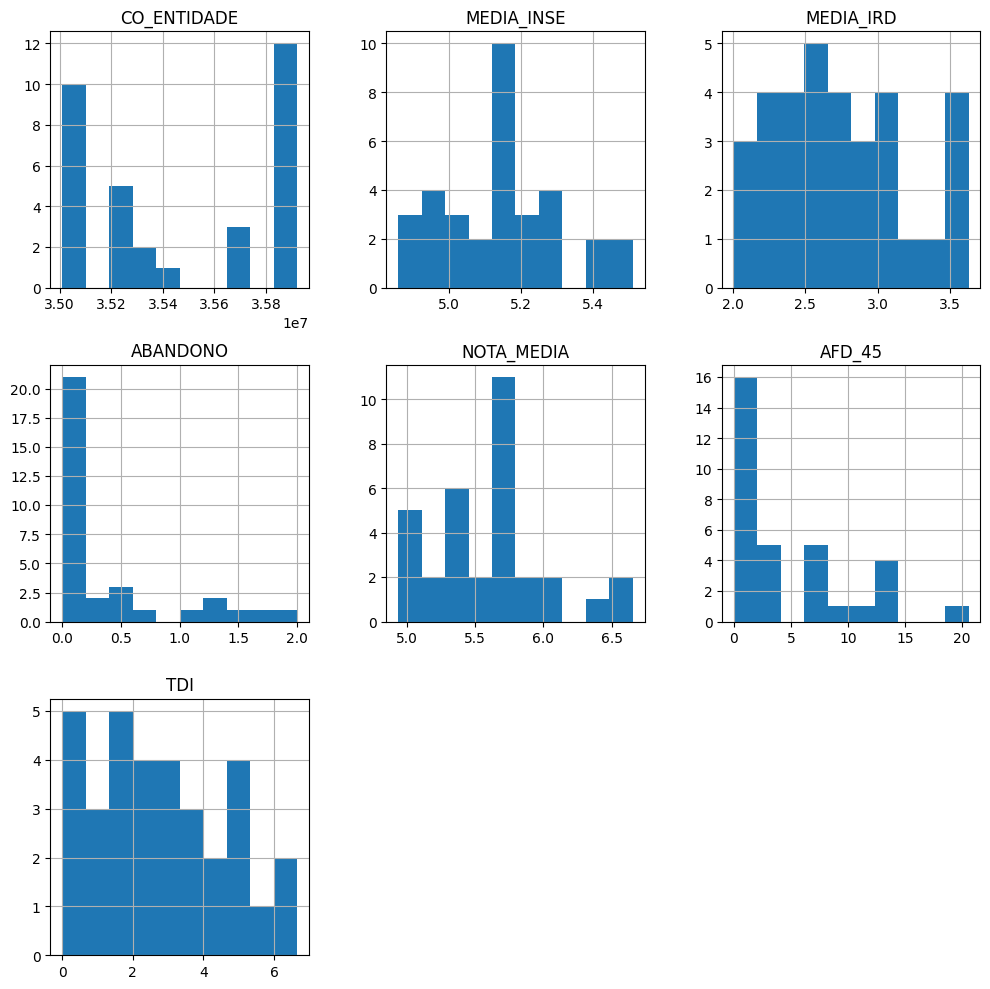

In [69]:
df_sel.hist(figsize=(12,12))

In [16]:
#df_ai['MEDIA_INSE'].fillna((df_ai['MEDIA_INSE'].mean()), inplace=True)
#df_ai['NOTA_MEDIA_AI'].fillna((df_ai['NOTA_MEDIA_AI'].mean()), inplace=True)
#df_ai.isnull().sum()

CO_ENTIDADE      0
MEDIA_INSE       0
APROVACAO_AI     0
NOTA_MEDIA_AI    0
AFD_AI_45        0
MEDIA_IRD        0
TDI_AI           0
HAD_AI           0
dtype: int64

# Escalonando os dados

In [70]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()



In [74]:
scaler.fit(df_sel[['MEDIA_INSE','ABANDONO','NOTA_MEDIA']])
df_escalonado = scaler.transform(df_sel[['MEDIA_INSE','ABANDONO','NOTA_MEDIA']])
df_escalonado

array([[ 0.45020948, -0.61245813, -0.63695455],
       [ 1.73296716, -0.61245813,  0.25879335],
       [ 0.20587469, -0.17998056, -0.30725177],
       [ 2.22163675,  1.5499297 , -0.73432639],
       [-0.3438786 ,  1.46343419, -1.54462854],
       [ 1.67188346, -0.61245813,  2.47739851],
       [ 1.97730196, -0.61245813,  1.85768812],
       [ 0.93887908,  2.04007094, -0.06335894],
       [ 0.        , -0.61245813,  0.25879335],
       [ 0.        ,  2.15539829,  0.25879335],
       [ 0.63346058,  0.59847906,  1.23977249],
       [ 0.        ,  2.8473624 ,  0.25879335],
       [-0.7103808 , -0.61245813,  0.25879335],
       [-0.83254819, -0.61245813, -0.98868533],
       [-0.4049623 ,  0.42548803, -0.35037061],
       [-1.26013409, -0.61245813, -1.51843313],
       [ 0.14479099, -0.61245813,  2.16975522],
       [ 0.        , -0.61245813,  0.25879335],
       [-1.07688299, -0.17998056, -0.5640014 ],
       [ 0.        , -0.61245813,  0.25879335],
       [-0.95471559, -0.61245813, -1.076

# Criando os Agrupamentos

In [75]:
# Definindo o modelo de clusterizacao. K-MEANS com 3 clusters
kmeans = KMeans(n_clusters=3,random_state=0) #definindo os hiperparametros do algoritmo (definir o número de grupo = cluster)
kmeans.fit(df_escalonado)

#Salvando os centroides de cada cluster
centroides = kmeans.cluster_centers_

#Salvando os labels dos clusters para cada exemplo
grupos = kmeans.predict(df_escalonado)
grupos



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2,
       1, 0, 2, 1, 2, 2, 2, 0, 0, 0, 0], dtype=int32)

In [77]:
df_sel['Grupos'] = grupos
df_sel.groupby('Grupos')[['MEDIA_INSE','ABANDONO','NOTA_MEDIA']].mean()

<ipython-input-77-38b876272b79>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sel['Grupos'] = grupos


,MEDIA_INSE,ABANDONO,NOTA_MEDIA
Grupos,,,
0,5.23,0.06,5.89
1,5.24,1.34,5.37
2,4.97,0.12,5.34


In [78]:
out_kmeans = df_sel[['CO_ENTIDADE','Grupos','MEDIA_INSE','ABANDONO','NOTA_MEDIA']]
out_kmeans.to_parquet('/content/drive/MyDrive/PosTech/Challenge/05 - Datathon/output/out_kmeans.parquet')